In [24]:
import numpy as np 
import pandas as pd

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:

url = './winequality-white.csv'
df = pd.read_csv(url, sep=';')


In [27]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [28]:
df['quality'].nunique()

7

In [29]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [30]:
(df['quality'].value_counts()/len(df))*100

6    44.875459
5    29.746835
7    17.966517
8     3.572887
4     3.327889
3     0.408330
9     0.102082
Name: quality, dtype: float64

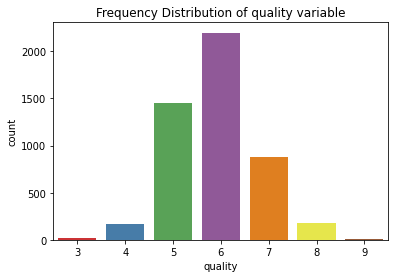

In [31]:
sns.countplot(x='quality', data=df, palette='Set1')
plt.title('Frequency Distribution of quality variable')
plt.show()

In [32]:
df['quality'] = [8 if x >= 9 else x for x in df['quality']]

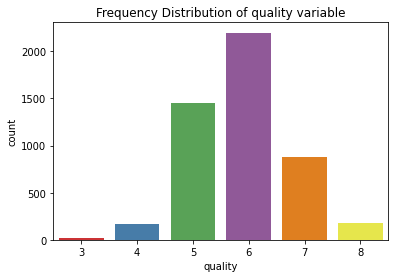

In [33]:
sns.countplot(x='quality', data=df, palette='Set1')
plt.title('Frequency Distribution of quality variable')
plt.show()

In [34]:
X = df.iloc[:, :11]
y = df.iloc[:, -1]

In [35]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.2, random_state=0)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0)

In [38]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [48]:
RandomForestClassifier(n_estimators=10, random_state=0)

RandomForestClassifier(n_estimators=10, random_state=0)

In [49]:
y_pred = rf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
print('Model Accuracy with 64 decision trees: ', accuracy_score(y_test, y_pred))

Model Accuracy with 64 decision trees:  0.8332069749810462


In [51]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [52]:
y_pred = rfc_100.predict(X_test)

In [53]:
print('Model Accuracy with 100 decision trees: ', accuracy_score(y_test, y_pred))

Model Accuracy with 100 decision trees:  0.8677028051554208


In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
print('Classification Report: \n\n', classification_report(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           3       0.99      1.00      0.99       447
           4       0.93      0.97      0.95       439
           5       0.80      0.81      0.80       420
           6       0.74      0.61      0.67       427
           7       0.78      0.85      0.82       442
           8       0.93      0.95      0.94       463

    accuracy                           0.87      2638
   macro avg       0.86      0.86      0.86      2638
weighted avg       0.86      0.87      0.86      2638

